In [ ]:
!git clone https://github.com/Jelwin13afc/FakeNewsDetection

Cloning into 'FakeNewsDetection'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 18), reused 18 (delta 7), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [ ]:
import pandas as pd
fake_news=pd.read_csv('/content/FakeNewsDetection/fake_news_basic.csv')
true_news=pd.read_csv('/content/FakeNewsDetection/true_news_basic.csv')

In [ ]:
"""
#add additional true news data
df_data = pd.read_csv('/content/FakeNewsDetection/more_true_news.csv', sep="\t", encoding='utf-8', header=None)

# true_news=true_news.drop(['long_description','full_title'],axis=1)
fake_news=fake_news.drop(['short_description','full_title'],axis=1)

df_data = df_data.drop(0,axis=1)
df_data = df_data.rename(columns={1:"long_description"})
df_data=df_data.dropna()
true_news = df_data

# frame = [true_news, df_data]
# true_news = pd.concat(frame, ignore_index=True)

# true_news=true_news.drop(['Unnamed: 0'],axis=1)
fake_news=fake_news.drop(['Unnamed: 0'],axis=1)
"""

'\n#add additional true news data\ndf_data = pd.read_csv(\'/content/FakeNewsDetection/more_true_news.csv\', sep="\t", encoding=\'utf-8\', header=None)\n\n# true_news=true_news.drop([\'long_description\',\'full_title\'],axis=1)\nfake_news=fake_news.drop([\'short_description\',\'full_title\'],axis=1)\n\ndf_data = df_data.drop(0,axis=1)\ndf_data = df_data.rename(columns={1:"long_description"})\ndf_data=df_data.dropna()\ntrue_news = df_data\n\n# frame = [true_news, df_data]\n# true_news = pd.concat(frame, ignore_index=True)\n\n# true_news=true_news.drop([\'Unnamed: 0\'],axis=1)\nfake_news=fake_news.drop([\'Unnamed: 0\'],axis=1)\n'

In [ ]:
true_news=true_news.drop(['Unnamed: 0'],axis=1)
fake_news=fake_news.drop(['Unnamed: 0'],axis=1)

In [ ]:
fake_news.head()

,short_description
0,बूम पाय इमरान खान भारत सरकार आलोच रह वर्तमान श...
1,सिख समुदाय के लोग हिंद साइन बोर्ड कालिख पोत दि...
2,सोशल मीडिय प्लेटफ़ॉर्म फ़ेसबुक ट्विटर दाव के बड़ ...
3,दाव भाजप के मा सरकार जन के गलत रह ।
4,मीडिय आउटलेट्स वायर एजेंस गलत तरीक दाव किय पाक...


In [ ]:
true_news.head()

,short_description
0,भारत ऑस्ट्रेलिय टेस्ट सिरीज़ ऐतिहासिक जीत दर्ज...
1,ब्रिस्बेन टेस्ट भारत दीवार कह वाल चेतेश्वर पुज...
2,पाकिस्ता टीव प्रेजेंटर सैय्यद इक़रारुल हसन अप ...
3,पूछ जाए दिल्ल पहल गणतंत्र दिवस परेड कह इसक जवा...
4,वेब सिरीज़ तांडव ले जार विवाद कार्टून


In [ ]:
# make both length equal
if len(fake_news) > len(true_news):
  fake_news = fake_news.head(len(true_news))
elif len(true_news) > len(fake_news):
  true_news = true_news.head(len(fake_news))
print("Length of fake news: ", len(fake_news))
print("Length of true news: ", len(true_news))

Length of fake news:  760
Length of true news:  760


In [ ]:
true_news['label']=1
fake_news['label']=0
news = pd.concat([fake_news, true_news])
news.tail()

,short_description,label
755,चालक कार रोक के बजाय चल जार रख ट्रैफ़िक पुलिसक...,1
756,मिसाइल 400 किलोमीटर ज़्याद मार सक,1
757,आकर्षण केंद्र वो शक्तिशाल पहलवान जिनक संबंध प्...,1
758,बिहार के जातिगत समीकरण बात लंब बीजेप हिंद पहचा...,1
759,एनआईए 83 साल के फ़ादर स्टेन स्वाम गिरफ़्तार यू...,1


In [ ]:
import tensorflow as tf
# Get the GPU device name.
device_name = tf.test.gpu_device_name()
# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch
# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 12.0 MB/s 
     |████████████████████████████████| 61 kB 488 kB/s 
     |████████████████████████████████| 895 kB 44.6 MB/s 
     |████████████████████████████████| 3.3 MB 44.9 MB/s 
     |████████████████████████████████| 596 kB 50.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#split train test
from sklearn.model_selection import train_test_split
train, test, labels, y_test = train_test_split(news, news['label'], test_size=0.2, stratify=news['label'],random_state=123, shuffle=True)

sentences = train.short_description.values
labels=labels.values

In [ ]:
from transformers import ElectraTokenizer
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = ElectraTokenizer.from_pretrained('monsoon-nlp/hindi-tpu-electra', do_lower_case=True) #bert-base-uncased

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/593k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/181 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/736 [00:00<?, ?B/s]

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
for sent in sentences:
    # `encode` will:  (1) Tokenize the sentence.   (2) Prepend the `[CLS]` token to the start.  (3) Append the `[SEP]` token to the end. (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,
                        add_special_tokens = True,  # Add '[CLS]' and '[SEP]'
                        # max_length = 64,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)
# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  विपक्ष कांग्रेस पार्ट सरकार स्थित स्पष्ट कह दूसर ओर सरकार कह स्थित उसक नज़र 
Token IDs: [3, 12651, 3874, 9898, 2405, 2113, 3524, 2190, 2343, 1008, 2474, 2405, 2190, 2113, 1994, 1017, 6852, 4]


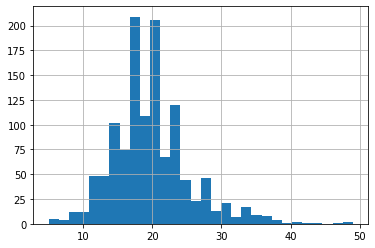

In [ ]:
seq_len = [len(sen) for sen in input_ids]
pd.Series(seq_len).hist(bins = 30)

In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  49


In [ ]:
# We'll borrow the `pad_sequences` utility function to do padding.
from keras.preprocessing.sequence import pad_sequences
# Set the maximum sequence length as 128 , as it should be slightly above 105
MAX_LEN = 96
print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)
print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))
# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence, as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long",
                          value=0, truncating="post", padding="post")
print('\Done.')


Padding/truncating all sentences to 96 values...

Padding token: "[PAD]", ID: 2
\Done.


In [ ]:
# Create attention masks
attention_masks = []
for sent in input_ids:

    # Create the attention mask. If a token ID is 0, then it's padding, set the mask to 0. If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]

    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [ ]:
# Use train_test_split to split our data into train and validation sets for training, 10% validation
from sklearn.model_selection import train_test_split
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
                                                            random_state=123, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=123, test_size=0.1)

In [ ]:
# Convert all inputs and labels into torch tensors, the required datatype for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# The DataLoader needs to know our batch size for training, so we specify it here.
batch_size = 32
# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
from transformers import  ElectraForSequenceClassification, AdamW, BertConfig
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.
model =  ElectraForSequenceClassification.from_pretrained(
    "monsoon-nlp/hindi-tpu-electra", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)
# Tell pytorch to run this model on the GPU.
model.cuda()

Downloading:   0%|          | 0.00/444M [00:00<?, ?B/s]

Some weights of the model checkpoint at monsoon-nlp/hindi-tpu-electra were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monsoon-nlp/hindi-tpu-electra and are newly initialized: ['classifier.dense.bia

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(39628, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0): ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())
print('The BERT model has {:} different named parameters.\n'.format(len(params)))
print('==== Embedding Layer ====\n')
for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== First Transformer ====\n')
for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== Output Layer ====\n')
for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

electra.embeddings.word_embeddings.weight               (39628, 768)
electra.embeddings.position_embeddings.weight             (512, 768)
electra.embeddings.token_type_embeddings.weight             (2, 768)
electra.embeddings.LayerNorm.weight                           (768,)
electra.embeddings.LayerNorm.bias                             (768,)

==== First Transformer ====

electra.encoder.layer.0.attention.self.query.weight       (768, 768)
electra.encoder.layer.0.attention.self.query.bias             (768,)
electra.encoder.layer.0.attention.self.key.weight         (768, 768)
electra.encoder.layer.0.attention.self.key.bias               (768,)
electra.encoder.layer.0.attention.self.value.weight       (768, 768)
electra.encoder.layer.0.attention.self.value.bias             (768,)
electra.encoder.layer.0.attention.output.dense.weight     (768, 768)
electra.encoder.layer.0.attention.output.dense.bias           (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
from transformers import get_linear_schedule_with_warmup

epochs = 5
# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128
# Set the seed value all over the place to make this reproducible.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
# Store the average loss after each epoch so we can plot them.
loss_values = []
start=time.time()
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time()
    total_loss = 0
    model.train()
    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        # Unpack this training batch from our dataloader.
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        # Always clear any previously calculated gradients before performing a backward pass.

        model.zero_grad()
        # Perform a forward pass .This will return the loss .
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the loss value out of the tuple.
        loss = outputs[0]
        # Accumulate the training loss over all of the batches so that we can calculate the average loss at the end. `loss` is a Tensor containing a single value
        total_loss += loss.item()
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # Clip the norm of the gradients to 1.0. This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # Update parameters and take a step using the computed gradient.
        optimizer.step()
        # Update the learning rate.
        scheduler.step()
    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on our validation set.
    print("")
    print("Running Validation...")
    t0 = time.time()
    # Put the model in evaluation mode--the dropout layers behave differently during evaluation.
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    for batch in validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and  speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions. This will return the logits rather than the loss because we have not provided labels.
            # token_type_ids is the same as the "segment ids"
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # Get the "logits" output by the model.
        logits = outputs[0]
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy
        # Track the number of batches
        nb_eval_steps += 1
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
print("")
print("Training complete!")
end=time.time()


======== Epoch 1 / 5 ========
Training...

  Average training loss: 0.69
  Training epcoh took: 0:00:31

Running Validation...
  Accuracy: 0.47
  Validation took: 0:00:01

======== Epoch 2 / 5 ========
Training...

  Average training loss: 0.69
  Training epcoh took: 0:00:31

Running Validation...
  Accuracy: 0.47
  Validation took: 0:00:01

======== Epoch 3 / 5 ========
Training...

  Average training loss: 0.69
  Training epcoh took: 0:00:31

Running Validation...
  Accuracy: 0.47
  Validation took: 0:00:01

======== Epoch 4 / 5 ========
Training...

  Average training loss: 0.69
  Training epcoh took: 0:00:31

Running Validation...
  Accuracy: 0.47
  Validation took: 0:00:01

======== Epoch 5 / 5 ========
Training...

  Average training loss: 0.69
  Training epcoh took: 0:00:31

Running Validation...
  Accuracy: 0.47
  Validation took: 0:00:01

Training complete!


In [ ]:
import plotly.express as px
f = pd.DataFrame(loss_values)
f.columns=['Loss']
fig = px.line(f, x=f.index, y=f.Loss)
fig.update_layout(title='Training loss of the Model',
                   xaxis_title='Epoch',
                   yaxis_title='Loss')
fig.show()

In [ ]:
sentences = test.short_description.values
labels = y_test.values
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
for sent in sentences:

    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256
                   )

    input_ids.append(encoded_sent)
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN,
                          dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)
# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)
# Set the batch size.
batch_size = 32
# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))
# Put model in evaluation mode
model.eval()

predictions , true_labels = [], []
# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch


  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)
  logits = outputs[0]
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)
print('DONE.')

Predicting labels for 304 test sentences...
DONE.


In [ ]:
count=0
guesses=[]
actual=[]
# For each input batch...
for i in range(len(true_labels)):

  # The predictions for this batch are a 2-column ndarray (one column for "0" and one column for "1"). Pick the label with the highest value and turn this in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()


  #calculate accuracy
  for j in range(len(pred_labels_i)):
    if(pred_labels_i[j]==true_labels[i][j]):
      count+=1
    guesses.append(pred_labels_i[j])
    actual.append(true_labels[i][j])


accuracy = count/len(y_test)

In [ ]:
print(accuracy)

0.5


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


print(accuracy_score(actual, guesses))
print(recall_score(actual, guesses))
print(precision_score(actual, guesses))
print(f1_score(actual, guesses))

0.5
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
print(end-start)

162.27748656272888
